# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [4]:
import os
os.getcwd()

'/Users/ericabonnette/Desktop/Springboard Projects/Frequentist Case Study'

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [54]:
medical.shape

(1338, 8)

In [55]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ At first, the std seemed outlandishly large, but when taking into acount the high skew of the data with a 
minumum of 1,121 dollars all the way up to 63,770 a std of 12,110 makes more sense. Generally with something like this it would be more appropriate to use other statistics for describing this data since it has such a long tail.

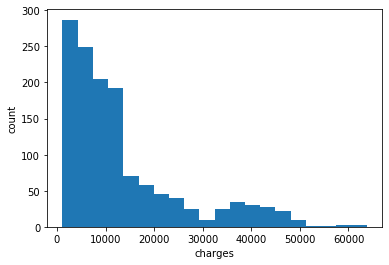

13270.422265141257 12110.011236693994


In [97]:
plt.hist(medical['charges'], bins= 20)
plt.ylabel('count')
plt.xlabel('charges')
plt.show()
meds = medical['charges'] 
meds = np.std(meds)
medmean = medical['charges'].mean()
medstd = medical['charges'].std(ddof=1)

print(medmean, medstd)

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  I would say that my data could justify the mean being closest to the actual values of what we are looking at based on CLT and the fact that the sample is greater than 30, which means the value of that sampling distribution is approximately normal, which can give us information on the mean of the actual population. I would then get a confidence interval to apply that justification since at the end of the day with something like a 95 percent interval we know roughyl 95 percent of the data will lie within it, and we don't know the actual mean.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ In this case, A confidence interval of 95% would be appropriate because we want to be tight with our assumptions. Because we are really only looking to see if our sample mean is below a certain threshold, it would make way more sense to use a one sided interval.

In [100]:
#trying to find out confidence interval of having a mean above or below 12000
#critical value = 12000
#ddof= n-1 so 
dof= 1338 - 1
#(1.0 - percent level of confidence, in this case .95) / 2 = alpha level. since this is one sided don't divide by 2.
alpha = .05
confidence_level_value = t.ppf(1-alpha, dof) #this is also called the critical t-value
#then calculate the confidence interval. since we only care about the lower range just subtract, don't add.

answer = medmean - (confidence_level_value * (medstd / np.sqrt(dof+1)))
print(answer)
#so what we know here is that 95 percent of the values of the sample exist above 12726.422265141257.
#This is important because with this knowledge, already that means that 95 percent of the data is above 12000 anyways.
#even the low end of this bar is 12726 
#remember that confidence interval is +- margin of error, which is how far we estimate a point to be from our 
#prediction.


12725.48718381623


In [ ]:
#null: there is no difference between charges for those with or without insurance

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here.

#null: there is no difference between charges for those with or without insurance 

Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [107]:
#1.)separate entries based on insurance or not
#2.)calculate means )
#If the calculated t-statistic is greater than the critical t-value(aka confidence level value),
#the test concludes that there is a 
#statistically significant difference between the two populations. Therefore, you reject the null hypothesis 
#that there is no statistically significant difference between the two populations.

med_insurance = medical[medical['insuranceclaim']==1]['charges']
med_no_insurance = medical[medical['insuranceclaim']==0]['charges']

medstd = np.std(med_insurance, ddof= 1)
nostd = np.std(med_no_insurance, ddof= 1)

mean_ins= med_insurance.mean()
mean_no= med_no_insurance.mean()


ins_len= len(med_insurance)
no_ins_len= len(med_no_insurance)
ddof = ins_len+ no_ins_len - 2

#according to the formula, S(sub0)**2 is the variance, so first you have to get the variance.

no_ins_var = np.var(med_insurance)
ins_var = np.var(med_no_insurance)

s_pooled_num = ((ins_len - 1) * ins_var) + ((no_ins_len - 1) * no_ins_var)

s_pooled = np.sqrt(s_pooled_num / ddof)
t_stat = (mean_ins - mean_no) / (s_pooled * np.sqrt((1 / ins_len) + (1 / no_ins_len)))


pval = 1 - t.cdf(t_stat,df=ddof)

print("t = " + str(t_stat))
print("p = " + str(2*pval))

t = 13.308578124910937
p = 0.0


In [106]:
t_value_pyth, p_value_pyth = ttest_ind(med_insurance, med_no_insurance)
print(t_value_pyth, p_value_pyth)

11.893299030876712 4.461230231620717e-31


__A:__ we are assuming that the variances of the two groups are controlled and randomized, and there are now hidden variables that are confounding the data

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ I'm not sure why my manual version is giving me different results. the fact that ttest reported an incredibly miniscule probability whereas the cdf reported zero probably has to do with rounding.

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test